<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/2_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone files on repository to Drive
!git clone https://github.com/andysontran/2-CHL5230-F23.git

# Set working directory
%cd 2-CHL5230-F23/

In [ ]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

**Dataframe characteristics:**

*   1465 rows, 12 columns
*   Columns: age (range: 14-73), gender (1-2), air pollution (1-8), alcohol usage (1-8), genetic risk (1-7), lung disease (1-7), obesity (1-7), smoking (1-8), passive smoker (1-8), chest pain (1-9), coughing of blood (1-9), severity (0-3)
*   Missing values = 0



In [ ]:
# Get shape of df
print(df.shape)

In [ ]:
# List columns of df
print(df.columns)

In [ ]:
# Display summary statistics
print(df.describe())

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

*Visualizing the Distribution*

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a histogram
def draw_histograms(df, variables, n_rows, n_cols):
  fig = plt.figure()
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    df[var_name].hist(bins = 10, ax = ax)
    ax.set_title(var_name + " Distribution")
    ax.title.set_size(8)
  fig.tight_layout()
  plt.show()

draw_histograms(df, df.columns, 3, 4)

**Implement K-NN with Scikit-Learn**

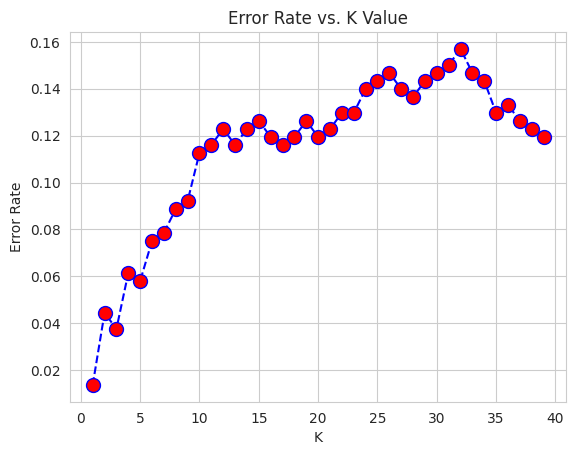

In [56]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Preprocess data
le = LabelEncoder()

# Split data into features and label
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------
# Check error rate for k = 1 to 40
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

# Plot line graph of error rate
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
# ----------

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 6 12  0 80]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        57
           1       0.83      1.00      0.91        58
           2       1.00      1.00      1.00        80
           3       1.00      0.82      0.90        98

    accuracy                           0.94       293
   macro avg       0.93      0.95      0.94       293
weighted avg       0.95      0.94      0.94       293



Text(0.5, 1.0, 'Confusion Matrix')

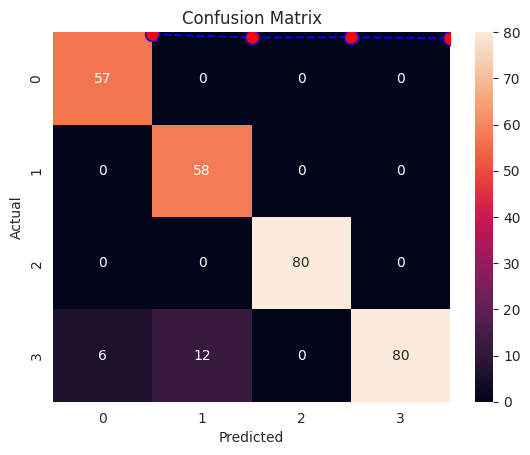

In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Preprocess data
le = LabelEncoder()

# Split data into features and label
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'manhattan')   # Set K = 4
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            fmt = 'g', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()